# Проект: исследование объявлений о продаже квартир

## Краткое описание проекта
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Техническое задание**

1. **Необходимо изучить данные и провести их пердобработку.**
2. **Посчитать и добавить в таблицу новые столбцы, которые помогут в дальнейшем анализе данных.**
3. **Провести исслндовательский анализ данных.**
        - Изучить основные параметры.
        - Изучить время продажи квартир.
        - Изучить факторы влияющие на стоимость квартиры.
        - Изучить среднюю стоимость квадратного метра в 10 городах с наибольшим количеством объявлений.
        - Изучить изменение цены при отдалении/приближении к центру города.
4. **Написать общий вывод по проделанной работе.**

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Необходимо проверить есть ли в данных явные дубликаты и уадлить их при наличии.

In [2]:
print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Теперь сохраним изначальное количество данных в таблице, чтобы потом посмотреть, сколько данных мы отфильтруем.

In [4]:
data_before_treatments = data.shape[0]
data_before_treatments

23699

Во многих столбцах есть пропуски, в некоторых пропущеных значений больше чем заполненных, все их стоит проверить. На первый взгляд самыми критичными кажутся пропуски в столбце **living_area**. Так же смущает, что столбец **balcony** относится к типу **float64**. 

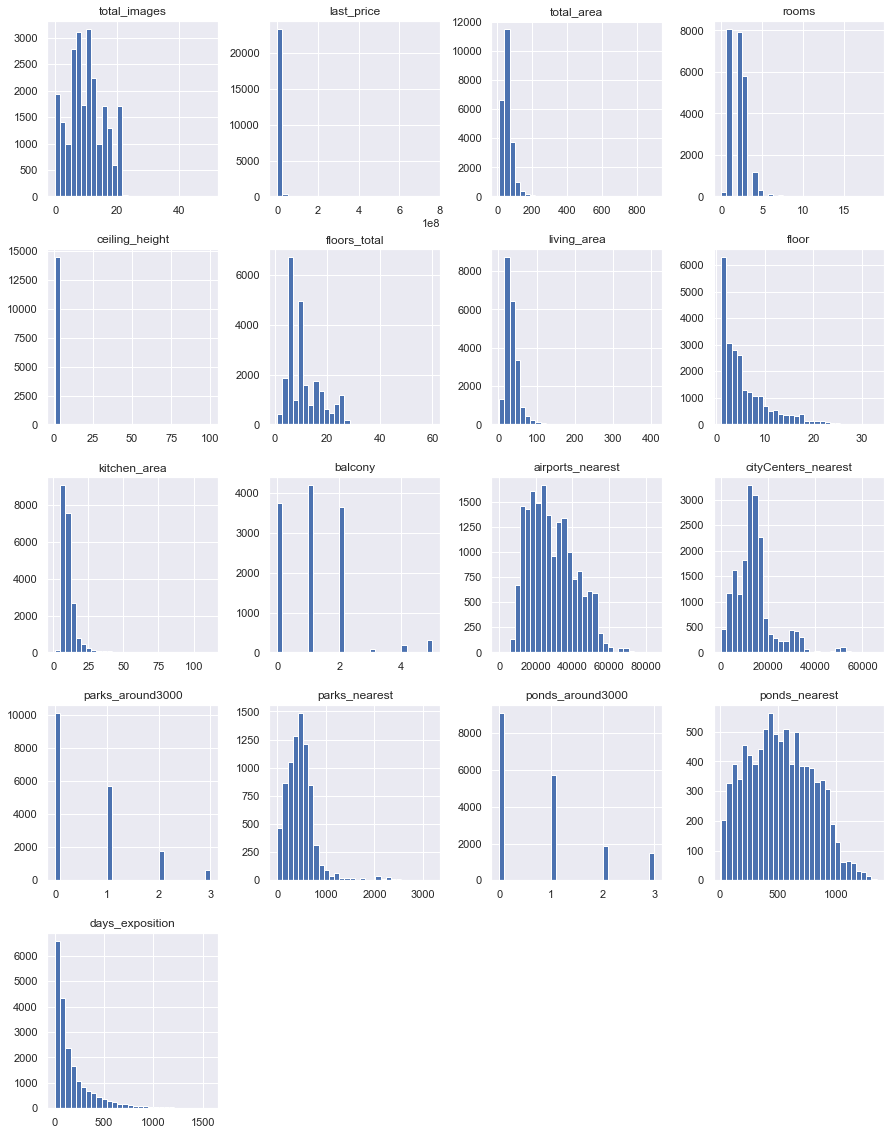

In [5]:
sns.set()
data.hist(figsize=(15, 20), bins=30)
plt.show()

На первый взгляд все гистограммы выглядят адекватно, но следует изучить данные и пропуски в столбцах подробнне.

### Предобработка данных

#### Редактирование имен столбцов

Первое, что я считаю необходимым сделать это поменять называение столбца **cityCenters_nearest** на **city_сenters_nearest**, а столбцов **parks_around3000** и **ponds_around3000** на **parks_around_3000** и **ponds_around_3000** соответственно, для более удобного обращения к ним.

In [6]:
data.rename(
    columns={
    'cityCenters_nearest' : 'city_сenters_nearest',
    'parks_around3000' : 'parks_around_3000',
    'ponds_around3000' : 'ponds_around_3000'
    }, 
    inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Работа с пропусками, редактирование типов данных, устранение аномалий.

Начнем с того, что поменяем тип данных в столбце **first_day_exposition** (дата публикации) на DataTime.

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Теперь необходимо разобраься с пропускам ив данных. По порядку рассмотри столбцы в которых возникают пропуски.

**ceiling_height** -  Высота потолков в метрах. Рассмотрев гистограмму значений этого столбца можно заметить, что все значения находятся около 0. Следует это проверить - посмотрим какие значения у нас есть.

In [8]:
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Высота потолков выше **10 метров** скорее всего вызвана какой-то ошибкой в данных или ошибкой при их переносе.  Возможно человек, который вводил данные поставил запятую не в том месте, умножив тем самым высоту потолков на **10**. 
Необходимо исправить это.

In [9]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10
sorted(data['ceiling_height'].unique())

[1.0,
 1.03,
 1.2,
 1.4,
 1.75,
 2.0,
 2.2,
 2.25,
 2.2600000000000002,
 2.7,
 nan,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,


Теперь рассмотрим среднее и медианное значение соответственно.

In [10]:
data['ceiling_height'].mean()

2.728099834528406

In [11]:
data['ceiling_height'].median()

2.65

Можно заметить, что нет почти никакой разницы между средним и медианным значением. Значит можем сразу заменить пропуски в данных на медианное значение, так как там меньше знаков после запятой и оно чуть более правдиво.

In [12]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#Проверка того, что в столбце больше нет пропущенных значений
data['ceiling_height'].isna().sum()

0

Теперь можно удалить аномальные значения из таблицы. Как известно, в Петербурге во многих старинных домах высокие потолки, но потолки высотой более **8 метров** вряд-ли встречаются в реальной жизни, только если кто-то не решил продать Исаакиевский Собор. Отфильтруем это значение. Так же необходимо внимательнее взглянуть на квартиры с потолками ниже **2 метров**, если цена таких квартир будет высокой, то скорее всего это какая-то ошибка, которую к сожалению тоже придется отфильтровать.

In [13]:
# Код ревьюера
sorted(data['ceiling_height'].unique())

[1.0,
 1.03,
 1.2,
 1.4,
 1.75,
 2.0,
 2.2,
 2.25,
 2.2600000000000002,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,

In [14]:
data = data.query('ceiling_height < 8')
# Проверка того, что все аномальные значения были исключены
data.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7.0,147.0,7,NaN,...,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000.0,71.0,2017-07-21,0,5.8,5.0,68.0,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.0,5,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1053,13,550000.0,29.0,2018-02-01,1,5.0,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
21923,10,115490000.0,235.0,2017-04-09,5,4.9,5.0,140.0,5,NaN,...,50.0,NaN,Санкт-Петербург,22777.0,1328.0,3.0,652.0,3.0,253.0,351.0
2802,7,14950000.0,50.0,2016-03-06,2,4.8,3.0,30.0,2,NaN,...,10.0,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0


Теперь необходимо взглянуть на аномально низкие значения.

In [15]:
data.sort_values(by='ceiling_height').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
22309,20,5300000.0,45.0,2017-09-30,1,1.03,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000.0,56.4,2018-05-11,2,1.40,14.0,32.4,5,NaN,...,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
5850,9,1650000.0,35.5,2018-05-29,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
16446,6,12300000.0,88.3,2019-03-12,3,2.00,5.0,63.9,2,NaN,...,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
2572,4,2400000.0,62.0,2018-12-27,3,2.00,5.0,40.0,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,11,2999000.0,33.5,2017-03-30,1,2.00,15.0,17.5,6,NaN,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
16884,0,1500000.0,33.0,2018-10-03,1,2.00,5.0,20.0,5,False,...,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0


Как видим, их не так много, но врядли кто-то захочет жить в квартире с высотой потолков **1 метр** за **6 млн. р.**

In [16]:
data = data.query('ceiling_height >= 2')
#Проверка того, что все аномальные значения исключены
data.sort_values(by='ceiling_height').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
552,11,2999000.0,33.5,2017-03-30,1,2.0,15.0,17.5,6,NaN,...,6.5,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
5850,9,1650000.0,35.5,2018-05-29,1,2.0,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
17496,15,6700000.0,92.9,2019-02-19,3,2.0,17.0,53.2,14,NaN,...,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
22960,17,2300000.0,53.6,2018-10-18,2,2.0,2.0,19.0,1,NaN,...,10.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19329,5,1700000.0,40.0,2018-07-15,2,2.0,9.0,NaN,8,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Построим гистограмму по улучшинным значениям и сравним с исходной.

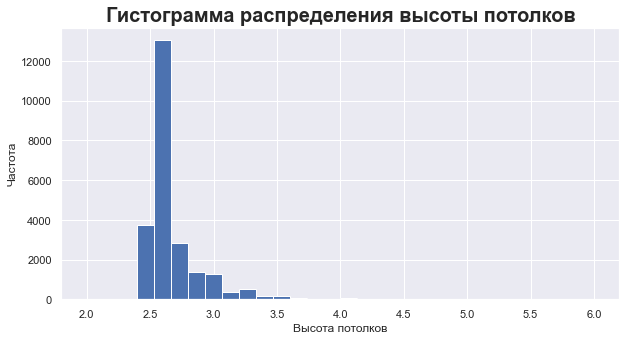

In [17]:
data.hist(column='ceiling_height', bins=30, range=(2, 6), figsize=(10, 5))
plt.title('Гистограмма распределения высоты потолков', fontsize=20, fontweight='bold')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()

На первый взгляд гистограмма не поменялась, но была проведена большая работа. Теперь данные в этом столбце корректны.

**floors_total** — Всего этажей в доме. Гистограмма этого столбца тоже выглядит есстественно. Изучим все пропущенные значения, т.к. их немного

In [18]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Ничего общего между значениями и пропусками нет и медианными их не заполнить - придется удалить строки в которых пропущено это значение.

In [19]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'].isna().sum() # Проверка того, что все пропущенные значения удалены

0

Осталось только поменять тип данных с **float64** на **int64**, потому что количество этажей должно быть целым числом.

In [20]:
data['floors_total'] = data['floors_total'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23603 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23603 non-null  int64         
 1   last_price            23603 non-null  float64       
 2   total_area            23603 non-null  float64       
 3   first_day_exposition  23603 non-null  datetime64[ns]
 4   rooms                 23603 non-null  int64         
 5   ceiling_height        23603 non-null  float64       
 6   floors_total          23603 non-null  int32         
 7   living_area           21733 non-null  float64       
 8   floor                 23603 non-null  int64         
 9   is_apartment          2773 non-null   object        
 10  studio                23603 non-null  bool          
 11  open_plan             23603 non-null  bool          
 12  kitchen_area          21374 non-null  float64       
 13  balcony         

**living_area** — Жилая площадь в квадратных метрах. Один из самых главных параметров, определяющих цену на недвижимость, тоже стоит изучить более подробно.

In [21]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19,1,2.65,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18,1,2.65,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03,3,2.70,12,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08,1,2.65,9,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Всего 1870 таких строк. Можно найти соотношение медианной общей площади к медианной жилой. А затем, заполнить пропуски в столбце **living_area** отношением общей площади к найденному соотношению.

In [22]:
living_area_ratio = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_area_ratio * data['total_area'], inplace=True)

In [23]:
# Проверка того, что все пропузенные значения заполнены 
data['living_area'].isna().sum()

0

**floor** — Этаж. Этот столбец необходимо проверить на аномальные значения.

In [24]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

В этом столбце с данными все порядке и аномальных значений в нем нет.

**is_apartment** —Апартаменты. По условию этот столбец должен содержать в себе булев тип данных. Необходимо проверить, что пошло не так.

In [25]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [26]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,91.730769,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.307692,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Скорее всего, пропуски в данных связвны с тем, что тот кто их заполнял вместо **False** просто пропускал этот пункт. Поэтому пропущеные значения заменим на **False**.

In [27]:
data['is_apartment'].fillna(False, inplace=True)
#Проверка того, что все пропуски в данных убраны
data['is_apartment'].isna().sum() 

0

Осталось только поменять тип столбца на **bool**.

In [28]:
data['is_apartment'].astype(bool)
data.info() # Проверка того, что тип столбца поменялся

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23603 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23603 non-null  int64         
 1   last_price            23603 non-null  float64       
 2   total_area            23603 non-null  float64       
 3   first_day_exposition  23603 non-null  datetime64[ns]
 4   rooms                 23603 non-null  int64         
 5   ceiling_height        23603 non-null  float64       
 6   floors_total          23603 non-null  int32         
 7   living_area           23603 non-null  float64       
 8   floor                 23603 non-null  int64         
 9   is_apartment          23603 non-null  bool          
 10  studio                23603 non-null  bool          
 11  open_plan             23603 non-null  bool          
 12  kitchen_area          21374 non-null  float64       
 13  balcony         

**kitchen_area** — Площадь кухни в квадратных метрах. Сначала рассмотрим значения со стороны максимума и минимума

In [29]:
data.sort_values(by='kitchen_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14,19.5,10,False,...,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
19642,5,1190000.0,14.00,2018-07-29,1,2.65,5,11.0,1,False,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
11033,6,5350000.0,32.00,2016-04-20,1,2.65,14,16.0,10,False,...,2.0,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
21419,4,1870000.0,20.00,2018-03-06,1,2.50,5,14.0,1,False,...,2.0,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
906,15,2600000.0,27.00,2017-07-10,1,2.75,23,18.0,18,False,...,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
9138,17,2920000.0,23.29,2018-12-12,1,2.65,3,21.0,1,False,...,2.0,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5,16.0,5,False,...,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
16367,2,2720000.0,25.70,2017-10-30,1,2.65,19,22.6,11,False,...,2.0,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
17834,5,2940000.0,34.70,2017-10-09,1,2.65,26,15.5,14,False,...,2.3,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3,14.0,3,False,...,2.4,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0


In [30]:
data.sort_values(by='kitchen_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20215,2,85000000.0,249.7,2018-02-01,3,2.65,10,72.0,9,False,...,107.0,4.0,Санкт-Петербург,31532.0,4624.0,1.0,2218.0,2.0,99.0,26.0
2489,9,12500000.0,255.0,2017-04-21,3,2.65,2,153.9,2,False,...,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
16239,5,82400000.0,181.1,2017-05-24,3,3.90,9,58.2,4,False,...,93.2,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0
16797,9,65850000.0,146.0,2017-07-14,2,2.65,9,40.0,3,False,...,93.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,77.0
10867,1,56844500.0,177.9,2015-01-15,3,2.65,6,87.2,5,True,...,87.2,NaN,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10,95.0,6,False,...,77.0,NaN,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.0,4,False,...,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
14644,17,47000000.0,150.0,2017-02-28,4,3.70,6,58.0,5,False,...,75.0,1.0,Санкт-Петербург,16085.0,7616.0,0.0,NaN,0.0,NaN,507.0


Необходимо посмотреть на среднее и медианное значение столбца **kitchen_area**.

In [31]:
data['kitchen_area'].mean()

10.564935903434078

In [32]:
data['kitchen_area'].median()

9.1

Они почти не отличаются друг от друга, но присваивать квартире площадью **200 квадратных метров** кухню площадью в **9 квадратных метров** не кажется разумным. Предлагаю вычислить какую в среднем часть площади занимает кухня, умножить это на столбец **total_area** и тогда мы получим примерное значение **kitchen_area** учитывая общую площадь квартиры. А если квартира - студия, поставить значение **kitchen_area** равное нулю.

In [33]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0 
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
# Проверка того, что все действия выполнены верно
print('Количество пропущенных значений:', data['kitchen_area'].isna().sum())
data[data['studio'] == True]

Количество пропущенных значений: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.500000,2,False,...,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.750000,4,False,...,0.0,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,14.423077,7,False,...,0.0,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.500000,21,False,...,0.0,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.000000,1,False,...,0.0,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,2.65,25,18.200000,5,False,...,0.0,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19,18.000000,10,False,...,0.0,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25,18.000000,16,False,...,0.0,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19,15.000000,8,False,...,0.0,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


**balcony** — Число балконов. В этом столбце две проблемы. Во-первых, число балконов не может быть типом **float64** нужно поменять его на **int64**. Во-вторых, пропущенные значения. Посмотрим на данные внимательнее.

In [34]:
data.sort_values(by='balcony').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8605,4,2600000.0,28.0,2016-03-09,1,2.65,20,19.5,14,False,...,4.000000,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,137.0
20266,9,5650000.0,69.1,2016-03-02,3,2.65,16,43.7,6,False,...,8.000000,0.0,Санкт-Петербург,13881.0,12677.0,0.0,NaN,0.0,NaN,335.0
9202,0,3500000.0,38.0,2016-02-01,1,2.65,12,20.0,6,False,...,6.576923,0.0,Санкт-Петербург,32899.0,11354.0,0.0,NaN,0.0,NaN,229.0
9195,8,1900000.0,33.0,2015-06-17,1,2.65,9,18.0,7,False,...,6.000000,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,783.0
20271,9,5300000.0,66.0,2016-04-30,2,2.65,23,31.4,5,False,...,15.000000,0.0,Санкт-Петербург,21928.0,17256.0,0.0,NaN,1.0,429.0,161.0
9185,4,3790000.0,73.0,2017-03-06,3,2.65,5,46.4,5,False,...,8.500000,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,181.0
20277,8,3380000.0,34.3,2017-01-09,1,2.65,4,15.0,1,False,...,8.500000,0.0,Санкт-Петербург,20371.0,1938.0,2.0,396.0,3.0,438.0,115.0
9180,11,4690000.0,56.0,2016-04-02,3,2.65,5,41.0,2,False,...,6.000000,0.0,Санкт-Петербург,39898.0,11601.0,1.0,385.0,0.0,NaN,146.0
20263,9,2450000.0,44.0,2015-03-18,2,2.65,5,29.0,1,False,...,5.600000,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,467.0
20278,2,2450000.0,35.0,2015-11-30,1,2.65,6,16.0,1,False,...,9.500000,0.0,поселок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,553.0


In [35]:
data.sort_values(by='balcony', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19004,16,7800000.0,69.0,2018-02-28,2,2.75,24,38.0,20,False,...,14.0,5.0,Санкт-Петербург,36553.0,14693.0,0.0,NaN,0.0,NaN,312.0
22223,8,6750000.0,54.0,2018-07-23,2,2.70,18,28.5,14,False,...,11.7,5.0,Санкт-Петербург,45929.0,18654.0,0.0,NaN,0.0,NaN,70.0
13091,20,8200000.0,64.0,2016-11-24,2,2.75,20,32.5,9,False,...,12.0,5.0,Санкт-Петербург,7659.0,13841.0,0.0,NaN,0.0,NaN,194.0
15136,15,4580000.0,46.6,2018-09-03,1,2.60,10,25.9,5,False,...,8.8,5.0,Санкт-Петербург,29354.0,11781.0,1.0,144.0,1.0,164.0,23.0
3006,16,4950000.0,70.0,2018-11-17,3,2.70,17,42.0,2,False,...,9.5,5.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,40.0
22086,5,4650000.0,57.5,2017-12-06,2,2.80,10,30.0,8,False,...,12.0,5.0,Санкт-Петербург,26510.0,14301.0,0.0,NaN,0.0,NaN,72.0
17383,12,10990000.0,69.0,2017-10-04,2,2.80,22,29.5,7,False,...,17.5,5.0,Санкт-Петербург,44151.0,13731.0,1.0,633.0,0.0,NaN,377.0
7433,7,6800000.0,68.0,2017-11-02,2,2.50,9,39.0,2,False,...,9.0,5.0,Санкт-Петербург,28005.0,9894.0,0.0,NaN,2.0,365.0,82.0
22100,9,8700000.0,81.4,2018-10-29,3,2.55,10,51.6,1,False,...,12.6,5.0,Санкт-Петербург,51236.0,14282.0,0.0,NaN,0.0,NaN,112.0
10174,16,5900000.0,82.0,2018-07-15,3,2.60,16,45.0,8,False,...,10.0,5.0,Санкт-Петербург,18867.0,22291.0,0.0,NaN,1.0,733.0,45.0


Скорее всего пропуски в данных связаны с тем, что человек, который их заполнял просто не указывал число балконов там где их нет. Поэтому пропущенные значения просто заменим на 0. После заменим тиа данных на **int64**.

In [36]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum() # Проверка того, что все пропущенные значения удалены

0

In [37]:
data['balcony'] = data['balcony'].astype('int')
data.info() # Проверка того, что тип данных поменялся 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23603 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23603 non-null  int64         
 1   last_price            23603 non-null  float64       
 2   total_area            23603 non-null  float64       
 3   first_day_exposition  23603 non-null  datetime64[ns]
 4   rooms                 23603 non-null  int64         
 5   ceiling_height        23603 non-null  float64       
 6   floors_total          23603 non-null  int32         
 7   living_area           23603 non-null  float64       
 8   floor                 23603 non-null  int64         
 9   is_apartment          23603 non-null  bool          
 10  studio                23603 non-null  bool          
 11  open_plan             23603 non-null  bool          
 12  kitchen_area          23603 non-null  float64       
 13  balcony         

**locality_name** — Название населённого пункта. В этом столбце необходимо проверить данные на дупликаты и разобраться с пропусками в них. Эти пропуски нельзя предугадать, поэтому данные в которых не указан населенный пункт просто исключим из таблицы.

In [38]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum() # Проверка того, что все пропущенные значения удалены

0

In [39]:
data['locality_name'].value_counts().count()

364

Найдем неявные дубликаты.

In [40]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'e')
    .replace('посeлок городского типа', 'поселок', regex=True)
    .replace('городской поселок', 'поселок', regex=True)
    .replace('посeлок Мурино', 'Мурино', regex=True)
    .replace('деревня Кудрово', 'Кудрово', regex=True)
    .replace('посeлок станции', 'поселок', regex=True)
    .replace('садоводческое некоммерческое товарищество', 'садовое товарищество', regex=True)
    .replace('посeлок при железнодорожной станции', 'поселок', regex=True)
    .replace('посeлок при железнодорожной станции', 'поселок', regex=True)
    .replace('коттеджный посeлок', 'поселок', regex=True)
    .replace('поселок имени', 'поселок', regex=True)
    )
data['locality_name'].unique()

array(['Санкт-Петербург', 'посeлок Шушары', 'городской посeлок Янино-1',
       'посeлок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фeдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посeлок Металлострой',
       'поселок Лебяжье', 'поселок Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посeлок Аннино',
       'поселок городского типа Ефимовский', 'посeлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посeлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посeлок Новый Свет', 'Сланцы',
       'село Путилово', 

Следующий столбец в которой мы рассмотрим это **days_exposition**.

In [41]:
data.pivot_table(index=data['first_day_exposition'].dt.year, values='days_exposition', aggfunc='count')

,days_exposition
first_day_exposition,
2014,118
2015,1095
2016,2677
2017,7887
2018,7524
2019,1083


In [42]:
data[data['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,41.307692,22,False,...,18.900000,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,2.65,22,23.076923,3,False,...,6.923077,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02,2,2.65,9,30.300000,7,False,...,7.000000,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31,2,2.60,24,29.700000,9,False,...,8.300000,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22,1,2.50,9,18.000000,7,False,...,6.000000,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.000000,2,False,...,11.000000,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27,3,2.50,9,39.000000,8,False,...,6.200000,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27,1,2.65,10,39.230769,6,False,...,11.769231,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13,2,2.65,2,27.460000,1,False,...,5.200000,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data['days_exposition'].isna().sum()

3171

In [44]:
data['days_exposition'].isna().sum() / data_before_treatments

0.13380311405544537

Столбец **days_exposition** является достаточно важным столбцом для нашего исследования, но никакой зависимости пропусков с другими данными увидеть не удалось. Пропущенные данные составляют около **13%** от общего объема данных.
Так же не удастся заполнить пропуски в столбцах **parks_around_3000** и **ponds_around_3000**, так как невозможно выяснить чем должны быть заполнены пропуски.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23555 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23555 non-null  int64         
 1   last_price            23555 non-null  float64       
 2   total_area            23555 non-null  float64       
 3   first_day_exposition  23555 non-null  datetime64[ns]
 4   rooms                 23555 non-null  int64         
 5   ceiling_height        23555 non-null  float64       
 6   floors_total          23555 non-null  int32         
 7   living_area           23555 non-null  float64       
 8   floor                 23555 non-null  int64         
 9   is_apartment          23555 non-null  bool          
 10  studio                23555 non-null  bool          
 11  open_plan             23555 non-null  bool          
 12  kitchen_area          23555 non-null  float64       
 13  balcony         

На этом с предобработкой данных окончено. Проверим какой процент данных мы отфильтровали во время предобработки.

In [46]:
1 - data.shape[0] / data_before_treatments

0.006076205747077901

Отлично, мы потеряли мене **1%** данных.

### Посчитайте и добавьте в таблицу новые столбцы

#### Рассчет цены за квадратный метр.

Необходимо рассчитать и добавить в таблицу столбец в котором будет храниться стоимость одного квадратного метра.

In [47]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,2,посeлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.730769,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


#### Нахождения дня недели, когда было опубликовано объявление.

Необходимо определить день недели в который было опубликовано объявление о продаже. Дни недели начинаются с 0, т.е. 0 - понедельник, 1 - вторник и т.д.  

In [48]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,посeлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.730769,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1


#### Определения месяца, когда было опубликовано объявление.

Необходимо добавить столбец в котором будет записан месяц в который было опублтиковано объявление о продаже.

In [49]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.730769,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6


#### Определения года, когда было опубликовано объявление.

Необходимо добавить столбец в котором будет записан год в который было опублтиковано объявление о продаже.

In [50]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.730769,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


####  Определение типа этажа квартиры.

Необходимо добавить столбец в которм будет записан тип этажа квартивы. Если квартира находится на первом этоже добавить в столбец тип - "первый", если на последнем - "последний", в остальных случаях добавить тип - "другой".

In [51]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.730769,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


#### Определить расстояние до центра в километрах.

Необходимо добавить столбце в котором будет храниться расстояние от дома до центра в киломертах и округлить, до ближайшего целого значения. Получить столбец типа **int64** получить не выйдет, так как у нас остались пропуски в данных.

In [52]:
data['city_сenters_nearest_km'] = data['city_сenters_nearest'] / 1000
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_сenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.730769,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучение основных параметров.

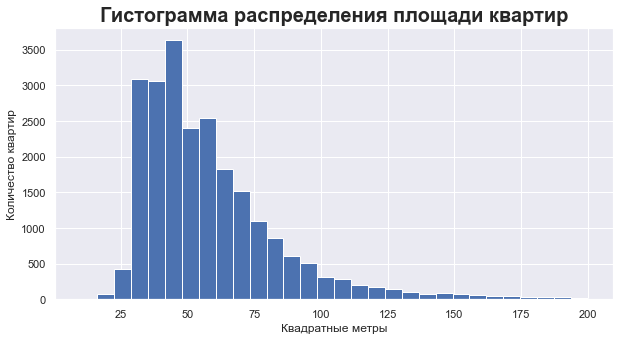

Квартиры с наибольшей площадью: 
 19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
Name: total_area, dtype: float64


In [53]:
# Изучение общей площади
data.hist('total_area', bins=30, range=(10,200), figsize=(10, 5))
plt.title('Гистограмма распределения площади квартир', fontsize=20, fontweight='bold')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Квартиры с наибольшей площадью:', '\n',
    data['total_area'].sort_values(ascending=False).head()
)

Больштнство продаваемых квартир имеют площадь в районе **40 метров квадратных**. А самая большая из представленных квартир имеет площадь **900 метров квадратных**.

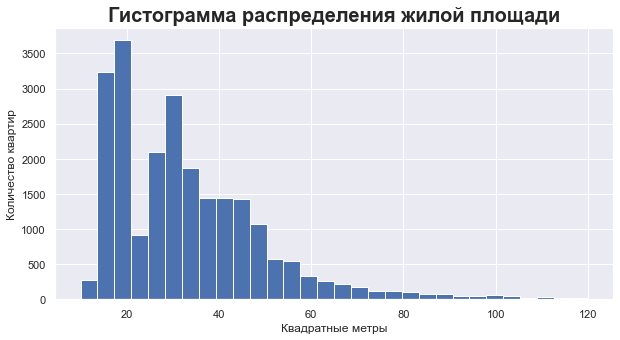

Квартиры с наибольшей жилой площадью: 
 19540    409.700000
5358     409.000000
3117     364.038462
12401    347.500000
4237     332.000000
Name: living_area, dtype: float64


In [54]:
# Изучение жилой площади
data.hist('living_area', bins=30, range=(10,120), figsize=(10, 5))
plt.title('Гистограмма распределения жилой площади', fontsize=20, fontweight='bold')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Квартиры с наибольшей жилой площадью:', '\n',
    data['living_area'].sort_values(ascending=False).head()
)

Наибольшее число квартир имеет жилую площадь около **20 мтеров квадратных**. Квартира с самой большой жилой площадью, предмтавленная в нашей выборке, имеет жилую площадь **409.7 метров квадратных**.

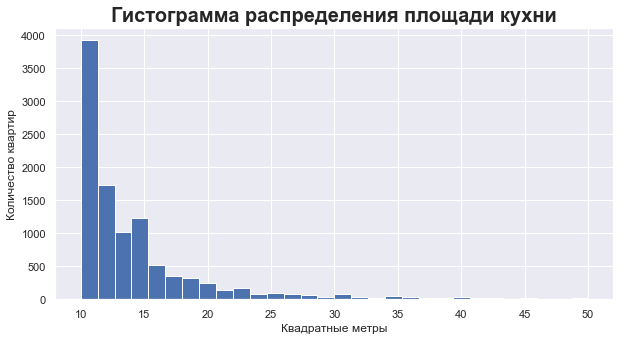

Квартиры с наибольшей площадью кухни: 
 19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64


In [55]:
# Изучение площадь кухни
data.hist('kitchen_area', bins=30, range=(10,50), figsize=(10, 5))
plt.title('Гистограмма распределения площади кухни', fontsize=20, fontweight='bold')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Квартиры с наибольшей площадью кухни:', '\n',
    data['kitchen_area'].sort_values(ascending=False).head()
)

Большинство квартир представленных в выборке имеют площадь кухни равную **10 - 12 метрам квадратным**. Наибольшая площадь кухни из пердставленных вариантов равна **112 метров квадратных**.

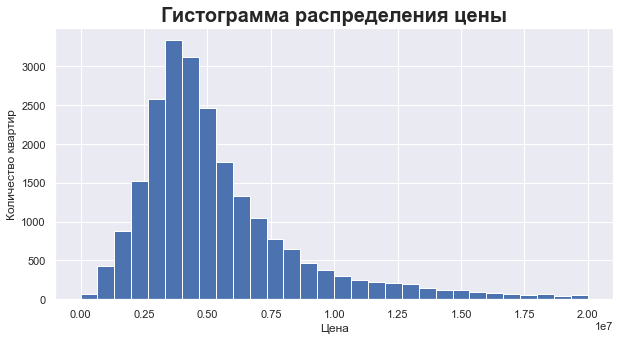

Квартиры с наибольшей стоимостью: 
 12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
Name: last_price, dtype: float64


In [56]:
# Изучение цен на недвижимость
data.hist('last_price', bins=30, range=(0,20000000), figsize=(10, 5))
plt.title('Гистограмма распределения цены', fontsize=20, fontweight='bold')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Квартиры с наибольшей стоимостью:', '\n',
    data['last_price'].sort_values(ascending=False).head()
)

Больщинство квартир из представленных объявлений продаются за **4 млн. р.**. Самая дорогая квартира представленная в списке стоит **763 млн. р.**.

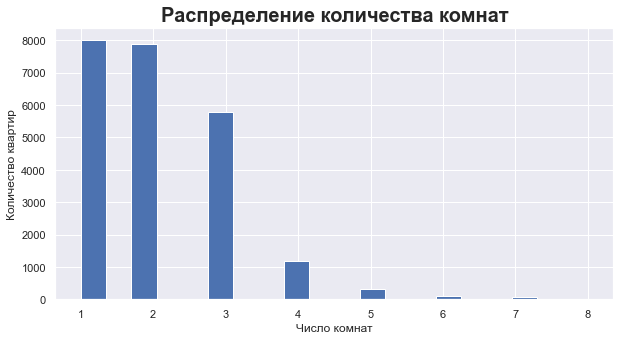

Квартиры с наибольшим количсетвом комнат: 
 14498    19
18848    16
5358     15
866      14
20829    14
Name: rooms, dtype: int64


In [57]:
# Изучение числа количества комнат
data.hist('rooms', bins=20, range=(1, 8), figsize=(10, 5))
plt.title('Распределение количества комнат', fontsize=20, fontweight='bold')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Квартиры с наибольшим количсетвом комнат:', '\n',
    data['rooms'].sort_values(ascending=False).head()
)

Большинство квартир в выборке имеют **1** или **2** комнаты. Самое большое число комнат в квартире представленной в выборке равно **19**.

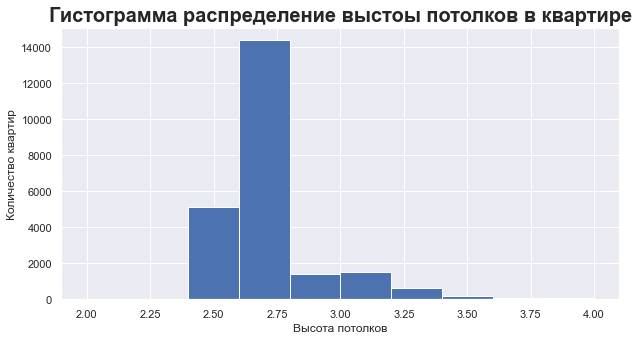

Квартиры с самыми высокими потолками: 
 20264    6.0
21227    5.8
1388     5.6
7578     5.5
1026     5.3
Name: ceiling_height, dtype: float64


In [58]:
# Изучение высоты потолков в квартирах
data.hist('ceiling_height', range=(2, 4), figsize=(10, 5))
plt.title('Гистограмма распределение выстоы потолков в квартире', fontsize=20, fontweight='bold')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Квартиры с самыми высокими потолками:', '\n',
    data['ceiling_height'].sort_values(ascending=False).head()
)

Чаще всего выста потолков в данной выборке равна **2.6 м**. Самые высокие потолки в выборке имеют высоту **8.3 м**.

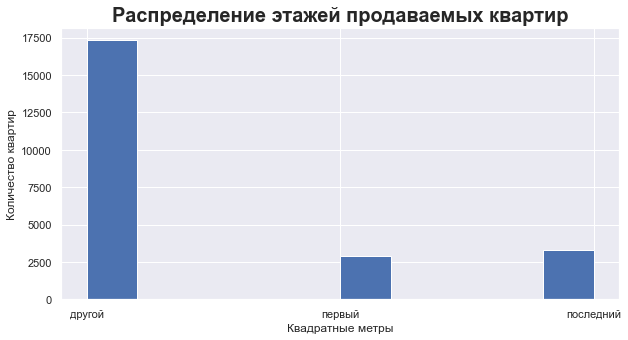

In [59]:
# Изучение типов этажей в квартире
plt.figure(figsize=(10, 5))
plt.hist(data['floor_category'])
plt.title('Распределение этажей продаваемых квартир', fontsize=20, fontweight='bold')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Как было логично предположить, большинство квартир находятся между первым и последним этожом. Доля квартир на последнем этаже чуть больше чем, квартир на первом.

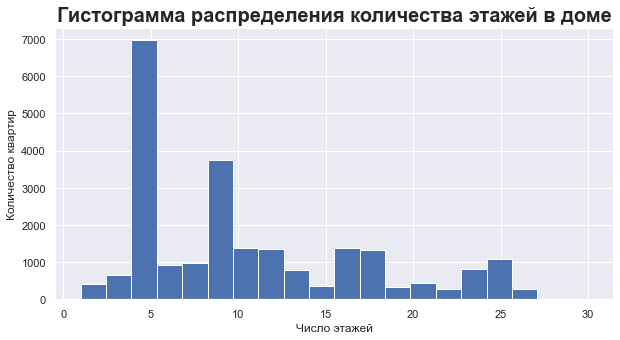

Квартиры с самыми высокими потолками: 
 2253     60
16731    52
397      36
11079    36
5807     36
Name: floors_total, dtype: int32


In [60]:
# Изучение общего количиства этажей в доме
data.hist('floors_total', bins=20, range=(1, 30), figsize=(10, 5))
plt.title('Гистограмма распределения количества этажей в доме', fontsize=20, fontweight='bold')
plt.xlabel('Число этажей')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Квартиры с самыми высокими потолками:', '\n',
    data['floors_total'].sort_values(ascending=False).head()
)

Большинство квартир продается в пятиэтажных домах. Самый высокий дом иммет **60 этажей**.

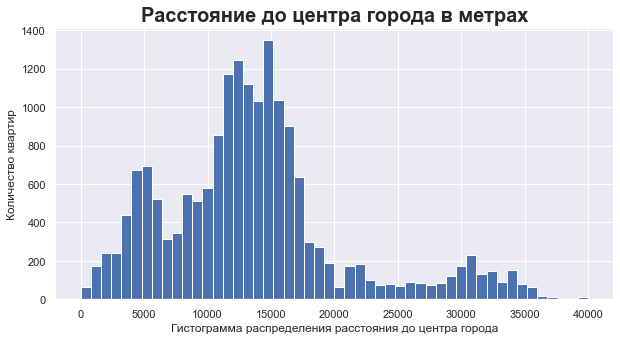

Самая удаленная от центра квартира:  
 9640    65968.0
Name: city_сenters_nearest, dtype: float64


In [61]:
# Изучение расстояния до центра города в метрах
data.hist('city_сenters_nearest', bins=50, range=(0, 40000), figsize=(10, 5))
plt.title('Расстояние до центра города в метрах', fontsize=20, fontweight='bold')
plt.xlabel('Гистограмма распределения расстояния до центра города')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Самая удаленная от центра квартира: ', '\n',
    data['city_сenters_nearest'].sort_values(ascending=False).head(1),
)

Большинство квартир находится на расстоянии **15000 м - 15 км** от центра города. Есть несколько квартир находящихся в самом его центре. Самая удаленная от центра квартира находится в **65 км** от него. 

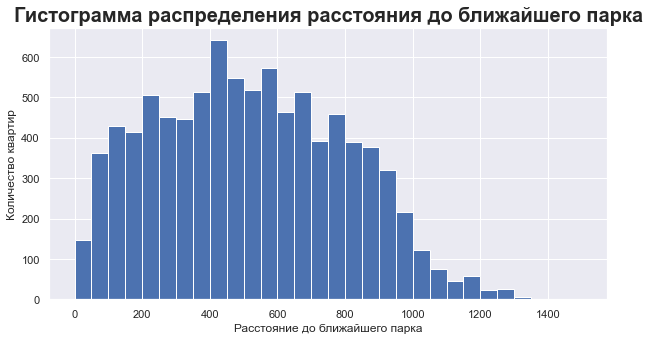

Самая удаленные от парка квартиры:  
 20726    1344.0
19138    1341.0
19924    1341.0
1476     1337.0
12054    1313.0
Name: ponds_nearest, dtype: float64


In [62]:
# Изучение расстояния до ближайшего парка
data.hist('ponds_nearest', bins=30, grid=True, range=(0, 1500), figsize=(10, 5))
plt.title('Гистограмма распределения расстояния до ближайшего парка', fontsize=20, fontweight='bold')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show()
print(
    'Самая удаленные от парка квартиры: ', '\n',
    data['ponds_nearest'].sort_values(ascending=False).head(),
)

Большинство квартир пердставлненных в выборке находятся в **400-ах метрах** от парка. Есть квартиры, которые расположены прямо у входа в парк. Самая дальняя от парка квартира находится в **1344-ах метрах от него**, но скорее всего есть квартиры и дальше, просто продавец решил не указывать эту информацию.

#### Изучения срока продажи квартир.

Необходимо изучить как продавались квартиры и определить какие продажи можно считать быстрыми, а какие необыкновенно долгими.

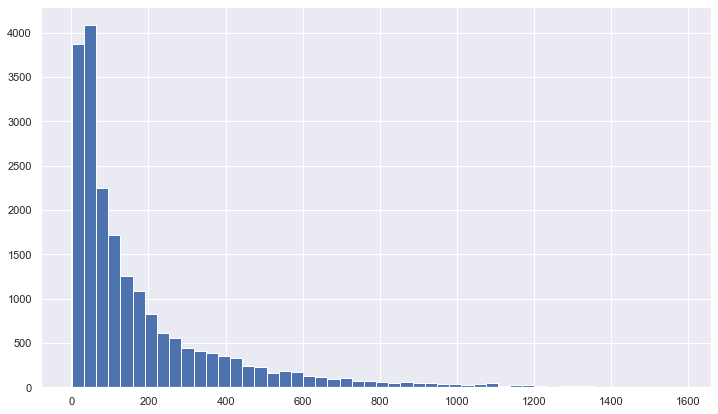

In [63]:
data['days_exposition'].hist(bins=50, figsize=(12, 7))
plt.show()

In [64]:
data['days_exposition'].mean().round(0)

181.0

In [65]:
data['days_exposition'].median()

95.0

Среднее время продажи квартиры равно **181 день**, медианное **95 дней**. Построим боксплот для того, чтобы более вниательно изучить данные.

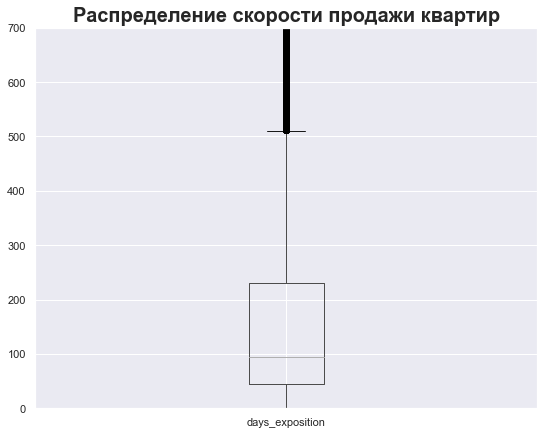

In [66]:
data.boxplot(column='days_exposition', figsize=(9, 7))
plt.ylim(0, 700)
plt.title('Распределение скорости продажи квартир', fontsize=20, fontweight='bold')
plt.show()

Из диаграммы размаха видно, что большинство квартир продаются достаточно быстро. Рассмотрим данные более точно при помощи метода .describe().

In [67]:
data['days_exposition'].describe()

count    20384.000000
mean       180.737637
std        219.754208
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Исходя из полученных данных можно сказать, что большинство квартир продается в течении **95 - 100 дней** с момента публикации.

Продажу можно считать быстрой, если она состоялась в течении **45 дней** и долгой, если она длилась более **230** дней.

#### Изучение факторов влияющих на стоимость квартиры.

Необходимо определить какие из факторов больше всего влияют на стоимость квартиры.

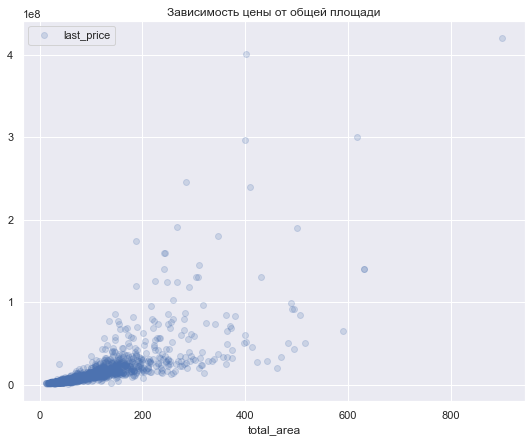

            last_price  total_area
last_price    1.000000    0.739087
total_area    0.739087    1.000000


In [68]:
# Зависимость цены от общей площади
(
    data
    .pivot_table(index='total_area', values='last_price')
    .plot(style='o',
          grid=True,
          figsize=(9, 7),
          alpha=0.2,
          title='Зависимость цены от общей площади',
         )
)
plt.show()
print(
    data
    .pivot_table(index='floor', values=['total_area', 'last_price'] )
    .corr()
)

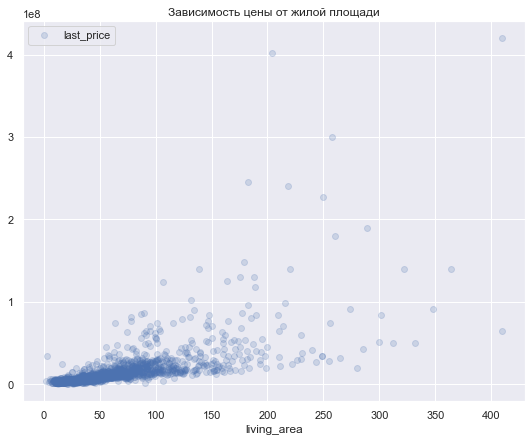

             last_price  living_area
last_price     1.000000     0.626717
living_area    0.626717     1.000000


In [69]:
# Зависимость цены от жилой площади
(
    data
    .pivot_table(index='living_area', values='last_price')
    .plot(style='o',
          grid=True,
          figsize=(9, 7),
          alpha=0.2,
          title='Зависимость цены от жилой площади')
)
plt.show()
print(
    data
    .pivot_table(index='floor', values=['living_area', 'last_price'] )
    .corr()
)

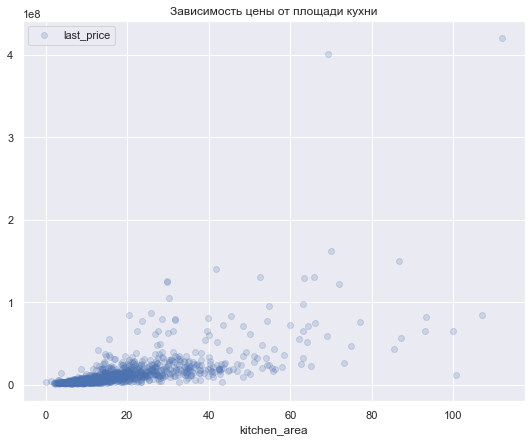

              kitchen_area  last_price
kitchen_area       1.00000     0.30975
last_price         0.30975     1.00000


In [70]:
# Зависимость цены от площади кухни
(
    data
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(style='o',
          grid=True,
          figsize=(9, 7),
          alpha=0.2,
          title='Зависимость цены от площади кухни'
         )
)
plt.show()
print(
    data
    .pivot_table(index='floor', values=['kitchen_area', 'last_price'] )
    .corr()
)

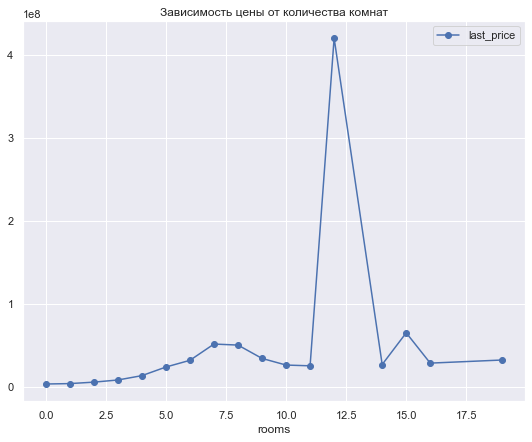

            last_price     rooms
last_price    1.000000  0.442834
rooms         0.442834  1.000000


In [71]:
# Зависимость цены от количества комнат
(
    data
    .pivot_table(index='rooms', values='last_price')
    .plot(style='o-',
          grid=True,
          figsize=(9, 7),
          alpha=1,
          title='Зависимость цены от количества комнат'
         )
)
plt.show()
print(
    data
    .pivot_table(index='floor', values=['rooms', 'last_price'] )
    .corr()
)

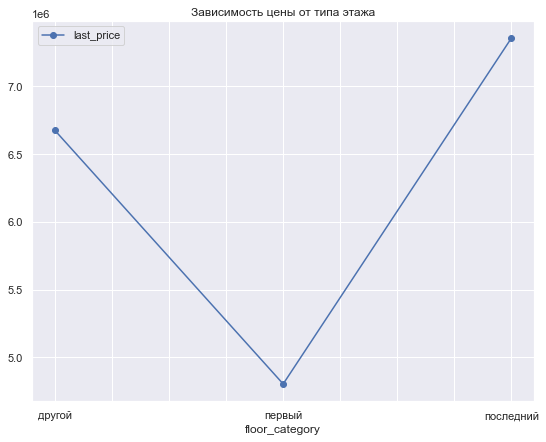

In [72]:
# Зависимость цены от типа этажа
(
    data
    .pivot_table(index='floor_category', values='last_price')
    .plot(style='o-',
          grid=True,
          figsize=(9, 7),
          alpha=1, 
          title='Зависимость цены от типа этажа'
         )
)
plt.show()

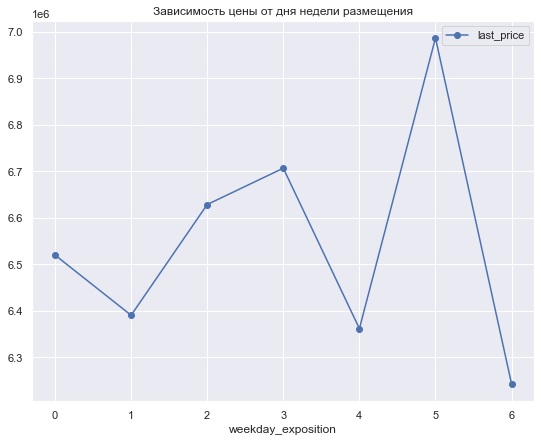

                    last_price  weekday_exposition
last_price            1.000000            0.323736
weekday_exposition    0.323736            1.000000


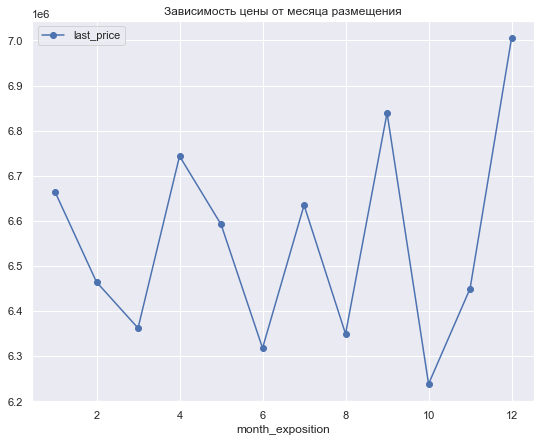

                  last_price  month_exposition
last_price          1.000000         -0.020535
month_exposition   -0.020535          1.000000


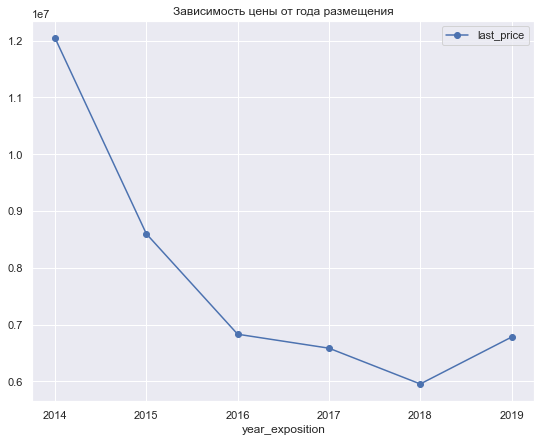

                 last_price  year_exposition
last_price          1.00000         -0.05514
year_exposition    -0.05514          1.00000


In [73]:
# Зависимость цены от дня недели размещения
(
    data
    .pivot_table(index='weekday_exposition', values='last_price')
    .plot(style='o-', grid=True, figsize=(9, 7), alpha=1, title='Зависимость цены от дня недели размещения')
)
plt.show()
print(
    data
    .pivot_table(index='floor', values=['weekday_exposition', 'last_price'] )
    .corr()
)

# Зависимость цены от месяца размещения
(
    data
    .pivot_table(index='month_exposition', values='last_price')
    .plot(style='o-', grid=True, figsize=(9, 7), alpha=1, title='Зависимость цены от месяца размещения')
)
plt.show()
print(
    data
    .pivot_table(index='floor', values=['month_exposition', 'last_price'] )
    .corr()
)

# Зависимость цены от года размещения
(
    data
    .pivot_table(index='year_exposition', values='last_price')
    .plot(style='o-', grid=True, figsize=(9, 7), alpha=1, title="Зависимость цены от года размещения")
)
plt.show()
print(
    data
    .pivot_table(index='floor', values=['year_exposition', 'last_price'] )
    .corr()
)

**Вывод**

Судя по проведенным исследованиям наибольшее влияние на стоимость недвижимости имеет ее общая площадь, с ней же у цены наибольший коэффициент корреляции. Зависимость от жилой площади примерно такая же, как и от общей. Площадь кухни на графике распределяется аналогично двум предыдущим площадаям, но коэффициент корреляции слишком маленький, чтобы делать какие-то выводы. 

Интересным фактом оказалось то, что количество комнат в квартире не имеет сильного влияния на ее стоимость. На графике виден некоторый выброс, но скорее всего это из-за одного или нескольких значений. 

И судя по полученным данным цена квартиры никак не зависит от дня недели когда она была выставлена на продажу и от месяца. Так же можно найти интересным то, что не цена не зависит от года размещения объявления.

#### Рассчет средней цены квадратного метра в десяти населенных пунктах с большим числом объявлений.

Необходимо рассчитать среднюю стоимось одного квадратного метра в десяти населенных пунктах с наибольшим количиством объявлений.

In [74]:
top_ten_city = data['locality_name'].value_counts().head(10)
(
    data
    .query('locality_name in @top_ten_city.index')
    .pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
    .sort_values(by='price_per_square_meter', ascending=False)
)

,price_per_square_meter
locality_name,
Санкт-Петербург,114841.153293
Пушкин,103125.819377
Кудрово,95260.846128
посeлок Парголово,90175.913089
Мурино,86105.897545
посeлок Шушары,78551.344647
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


Из полученной таблицы видно, что самые высокие цены на один квадратный метр недвижимости в Санкт-Петербурге, но отличие от цен в Пушкине не такое большое. Самая маленькая цена на квадратный метр из топ 10 городов в Выборге.

#### Изучени изменения цены для каждого километра от центра Петербурга.

Необходимо изучить как изменяеться цена при удалении/приближении недвижимости к центру Санкт-Петербурга.

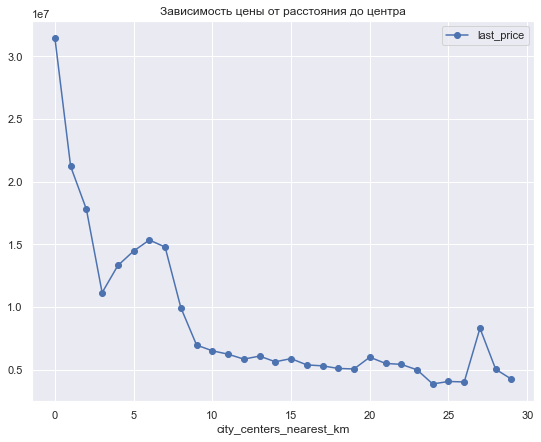

In [75]:
(
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_сenters_nearest_km', values='last_price')
    .plot(style='o-', grid=True, figsize=(9, 7), title="Зависимость цены от расстояния до центра")
)
plt.show()

**Вывод**

Как и следовало ожидать, что при приближении к центру города цены на недвижимось кратно возрастают относительно окраин. Переходной точкой можно считать расстояние в **9 км** от центра города, после него цены на недвижимомть не так сильно разняться.

### Общий вывод

Была проведена большая работа по предобработке и анализу данных. Были изучены зависимости стоимости квартиры от различных факторов, была изучена информация о сроках продажи квартир и стоимость одного квадратного метра в 10 городах с наибольшим числом объявлений.

**Срок продажи квартиры**

- Большинство квартир продаются в течении 95 - 100 дней со дня публикации объявлнеия.
- Если квартира продана быстрее чем за 45 дней можно считать это быстрой продажей.
- Если квартира продона более чем за 230 дней можно считать это долгой продажей.

**Факторы влияющие на стоимость квартиры**

- Наибольшее влияние на стоимость квартиры имеет ее расположение относительно центра города (чем ближе к центру тем дороже).
- Так же большое влияние на стоимость квартиры имеет ее общая и жилая площадь (чем больше тем дороже квартира).
- День недели, месяц и год не имееют практически никакого влияния на стоимость недвижимости.

**Стоимость квадратного метра в 10 городах с самым большим количиством объявлений**

- Самая высокая цена за квадратный метр в Санкт-Петербурге, она равна 114841 р. за квадратный метр.
- Самая низкая цена за квадратный метр в Выборге, она равна 58141 р. за квадратный метр.
